# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

Describe (all) the information that is available. Be sure to note any surprising or unusual features. (For example, some information sources have missing data, which may be blank or flagged using values like -99, NaN, or something else.)

**File Description**

The data that will be read in our program will be 'motor_vehicle_fatalities_by_role.csv.'.

Column names:
- Year
    - From 1996 to 2013 inclusive
- Role
    - Identifies how the fatalities occured. That is, cyclist, car driver, other, pedestrian, and car passenger.
- Fatalities
    - Describes the number of fatalities for each role in a specified year.
    
Dataset Information:

All the cells are non-empty, and the sample sizes are all equal for each role and attributed year.


### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

You must brainstorm at least three ideas for graphs or charts that your program could produce and choose the one that you'd like to work on. You can choose between a line chart, histogram, bar chart, scatterplot, or pie chart.

**Visual Output of Program**
- Bar chart comparing the number of total deaths for each mode of transport within 1996 and 2013
- Scatterplot of showing a general trend for the total deaths per year
- Piechart of total number of deaths caused by specific roles between years 1996 to 2013

**Numerical Output of Program**
- Total number of deaths for each role from 1996 to 2013 
- The percentage the number of deaths for each role hold in the grand total of deaths from 1996 to 2013

**Goals**
1. Determine the safest mode of transport 
2. Determine the general trend of total deaths each year starting from 1996 until and inculding 2013

### Step 1c: Planning 
#### Write or draw examples of what your program will produce


You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the bottom of the Edit menu.


## Numerical Calculations Examples

**Total Deaths Per Role calculation**

```python
expect(ttl_deaths(LOMVF1,[405, 123, 446, 789, 102])
```

Set containing:

$$ (\text{# of deaths (cyclist)}) =  \sum_{n=1996}^{2013} \text{# of deaths cyclist in year n}$$

$$ (\text{# of deaths (car driver)}) =  \sum_{n=1996}^{2013} \text{# of deaths car driver in year n}$$

$$ (\text{# of deaths (other)}) =  \sum_{n=1996}^{2013} \text{# of deaths other in year n}$$

$$ (\text{# of deaths (car passenger)}) =  \sum_{n=1996}^{2013} \text{# of car passenger deaths in year n}$$



**Total Deaths Calculation**
```python
expect(ttl_deaths(LOMVF12),[1,2,3,4,5])
```


$$\text{Total deaths} = \{\text{ deaths cyclist},\text{ deaths car driver},\text{deaths other}, \text{deaths pedestrian}, \text{ deaths car passenger}\}$$

**Total Deaths per year calculation** 
```python
deaths_per_year(list(range(1996,2014)),read('motor_vehicle_fatalities_by_role.csv'))
```
$$ \{n \in \{\text{within and including 1996 and 2013}\} \text{ s.t. } \text{Total Deaths in year n} \}$$


**Percentages of the number of deaths according to a role** 
```python
expect(percentages([1,2,3,4]),[6.66,13.33,20.00,26.66])
```

$$ \frac{\text{# of deaths cyclist}}{Total Deaths} \times 100 = a\ $$

$$ \frac{\text{# of deaths car driver}}{Total Deaths} \times 100 = b $$

$$ \frac{\text{# of deaths other}}{Total Deaths} \times 100 = c $$

$$ \frac{\text{# of deaths pedestrian}}{Total Deaths} \times 100 = d $$

$$ \frac{\text{# of deaths car passenger}}{Total Deaths} \times 100 = e $$

$$\{a,b,c,d \}$$

Such that a,b,c,d,e are the outcomes of each percentage calculation rounded to 2 decimal places 


## Visual Examples

## 1c cont'd Bar Chart
```python
expect(main_1('motor_vehicle_fatalities_by_role.csv'),None)
```

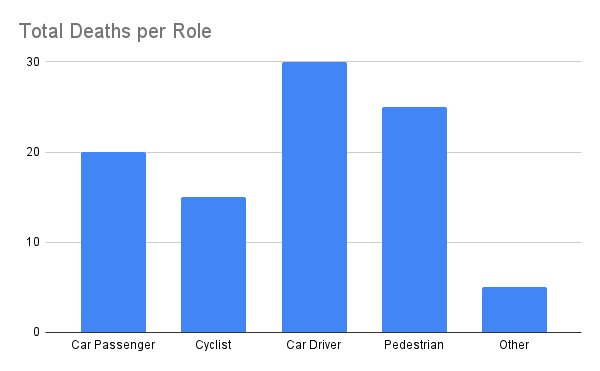

## 1c cont'd Scatter Plot
```python
expect(main_2('motor_vehicle_fatalities_by_role.csv'),None)
```

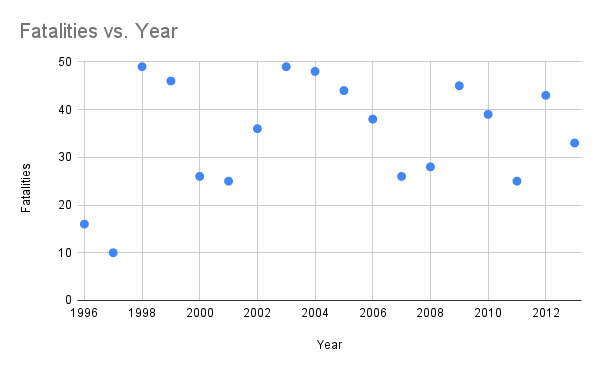

## 1c cont'd Pie Chart
```python
expect(main_2('motor_vehicle_fatalities_by_role.csv'),None)
```

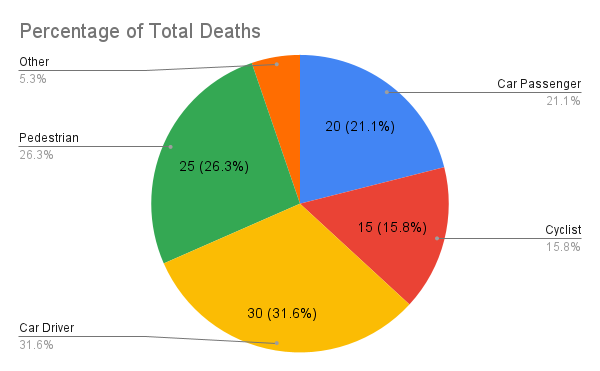

### Step 2a: Building
#### Document which information you will represent in your data definitions
#### Design data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

In [12]:
from cs103 import *
from typing import NamedTuple, List
import csv
import matplotlib.pyplot as plt
import numpy as np 

##################
# Data Definitions


MotorVehicleFatalities = NamedTuple('MotorVehicleFatalities', [('Year', int), ('Role', str), ('Fatalities',int)])

# interp. The year, the type of role associated to the fatality, and the number of fatalities in the given year

MVF1 = MotorVehicleFatalities(1996, 'Cyclist', 6)
MVF2 = MotorVehicleFatalities(1996, 'Car Driver', 235)

#################

@typecheck
def fn_for_motor_vehicle_fatalities(mvf: MotorVehicleFatalities) -> ...: # template based on compound 
    return ...(mvf.Year, mvf.Role,mvf.Fatalities)

# List[MotorVehicleFatalities]
# interp. a list of motor vehicle fatalities

LOMVF0 = []
LOMVF1 = [MVF1]
LOMVF2 = [MVF1,MVF2]

@typecheck
def fn_for_lomvf(lomvf: List[MotorVehicleFatalities]) -> ...: 
    # template based on arbitrary-sized and the reference rule 
    # description of the acc                           
    acc = ... # type: ...
    for mvf in lomvf:
        acc = ...(acc, fn_for_motor_vehicle_fatalities(mvf))
    return ...(acc)


### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

### Step 2b Design a function to read the information and store it as data in your program

In [13]:
###########
# Read

 
@typecheck
def read(filename: str) -> List[MotorVehicleFatalities]:
    """    
    reads information from the specified file and returns ALL MotorVehicleFatalities
    """
    # return []  #stub
    # Template from HtDAP
    # lomvf contains the result so far
    lomvf = [] # type: List[MotorVehicleFatalities]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            
            mvf = MotorVehicleFatalities(parse_int(row[0]), to_str(row[1]) ,parse_int(row[2]))
            lomvf.append(mvf)
    
    return lomvf


def to_str(string:str) -> str:
    """ string returns itself """
    #template ... (string) 
    #stub 'string' 
    return string




#Begin testing (For read function)

# Examples and tests for read
start_testing()

expect(read('test1.csv'),
      [MotorVehicleFatalities(Year=1996, Role='Cyclist', Fatalities=6),
       MotorVehicleFatalities(Year=1996, Role='Car Driver', Fatalities=235),
       MotorVehicleFatalities(Year=1996, Role='Other', Fatalities=7), 
       MotorVehicleFatalities(Year=1996, Role='Pedestrian', Fatalities=71), 
       MotorVehicleFatalities(Year=1996, Role='Car Passenger', Fatalities=150)])

expect(read('test2.csv'),
       [MotorVehicleFatalities(Year=1997, Role='Cyclist', Fatalities=8),
 MotorVehicleFatalities(Year=1997, Role='Car Driver', Fatalities=231),
 MotorVehicleFatalities(Year=1997, Role='Other', Fatalities=5),
 MotorVehicleFatalities(Year=1997, Role='Pedestrian', Fatalities=50),
 MotorVehicleFatalities(Year=1997, Role='Car Passenger', Fatalities=135)])


summary()

2 of 2 tests passed


### Step 2c Design functions to analyze the data

10 of 10 tests passed


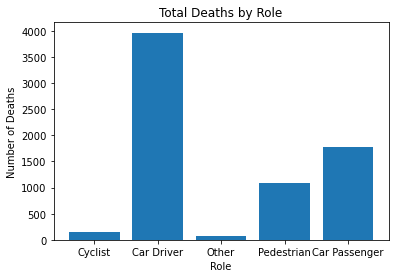

In [14]:
#### BAR

@typecheck
def main_1(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, 
    returns a barchart of the total deaths for each role. 
    """
    # None #stub
    # Template from HtDAP, based on function composition 
    
    x_values = ['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger'] #HELPER
    y_values = put(x_values,filename) 
    plt.xlabel('Role')
    plt.ylabel("Number of Deaths")
    plt.title('Total Deaths by Role')
    plt.bar(x_values,y_values)
    
    return None  

@typecheck
def read_by_role(role:str, file: List[MotorVehicleFatalities]) -> List[MotorVehicleFatalities]: 
    """" return lomvf according to given role"""
    given_file = file 
    # ... (year,file) #template
    # [] stub
    return [mvf for mvf in given_file if mvf.Role == role]

@typecheck
def ttl_deaths(lomvf: List[MotorVehicleFatalities]) -> int: 
    """return the sum of # of deaths given lomvf"""
    # template based on arbitrary-sized and the reference rule 
    # acc is List[int]  
    # 0 stub
    
    acc = [] # type: List[int] 
    for mvf in lomvf:
         acc.append(mvf.Fatalities)
    return sum_deaths(acc)

@typecheck
def sum_deaths(lod: List[int]) -> int:
    """" Take sum of int in a list """
    # return 0 #stub
    # return ... (loi)
    
    death_sum = 0 #type: int 
    for d in lod:
        death_sum = d + death_sum
    return death_sum

def put(los: List[str],filename: str) -> List[int]:
    """return the list of total deaths"""
    # ... (los,filename) #template based on aribtary sized, reference rule and function composition  
    # [] stub
    acc = []
    for s in los:
        acc.append(ttl_deaths(read_by_role(s,read(filename))))
    return acc

###### TESTS #####

start_testing()

# TESTS FOR main_1
expect(main_1('motor_vehicle_fatalities_by_role.csv'),None)

#TESTS FOR read_by_role
expect(read_by_role('Cyclist',read('motor_vehicle_fatalities_by_role.csv')),
       [MotorVehicleFatalities(Year=1996, Role='Cyclist', Fatalities=6),
 MotorVehicleFatalities(Year=1997, Role='Cyclist', Fatalities=8),
 MotorVehicleFatalities(Year=1998, Role='Cyclist', Fatalities=10),
 MotorVehicleFatalities(Year=1999, Role='Cyclist', Fatalities=9),
 MotorVehicleFatalities(Year=2000, Role='Cyclist', Fatalities=3),
 MotorVehicleFatalities(Year=2001, Role='Cyclist', Fatalities=3),
 MotorVehicleFatalities(Year=2002, Role='Cyclist', Fatalities=6),
 MotorVehicleFatalities(Year=2003, Role='Cyclist', Fatalities=6),
 MotorVehicleFatalities(Year=2004, Role='Cyclist', Fatalities=8),
 MotorVehicleFatalities(Year=2005, Role='Cyclist', Fatalities=7),
 MotorVehicleFatalities(Year=2006, Role='Cyclist', Fatalities=12),
 MotorVehicleFatalities(Year=2007, Role='Cyclist', Fatalities=10),
 MotorVehicleFatalities(Year=2008, Role='Cyclist', Fatalities=9),
 MotorVehicleFatalities(Year=2009, Role='Cyclist', Fatalities=10),
 MotorVehicleFatalities(Year=2010, Role='Cyclist', Fatalities=6),
 MotorVehicleFatalities(Year=2011, Role='Cyclist', Fatalities=7),
 MotorVehicleFatalities(Year=2012, Role='Cyclist', Fatalities=11),
 MotorVehicleFatalities(Year=2013, Role='Cyclist', Fatalities=13)])

expect(read_by_role('Other',read('motor_vehicle_fatalities_by_role.csv')),
       [MotorVehicleFatalities(Year=1996, Role='Other', Fatalities=7),
 MotorVehicleFatalities(Year=1997, Role='Other', Fatalities=5),
 MotorVehicleFatalities(Year=1998, Role='Other', Fatalities=12),
 MotorVehicleFatalities(Year=1999, Role='Other', Fatalities=6),
 MotorVehicleFatalities(Year=2000, Role='Other', Fatalities=8),
 MotorVehicleFatalities(Year=2001, Role='Other', Fatalities=4),
 MotorVehicleFatalities(Year=2002, Role='Other', Fatalities=3),
 MotorVehicleFatalities(Year=2003, Role='Other', Fatalities=10),
 MotorVehicleFatalities(Year=2004, Role='Other', Fatalities=2),
 MotorVehicleFatalities(Year=2005, Role='Other', Fatalities=6),
 MotorVehicleFatalities(Year=2006, Role='Other', Fatalities=0),
 MotorVehicleFatalities(Year=2007, Role='Other', Fatalities=1),
 MotorVehicleFatalities(Year=2008, Role='Other', Fatalities=3),
 MotorVehicleFatalities(Year=2009, Role='Other', Fatalities=3),
 MotorVehicleFatalities(Year=2010, Role='Other', Fatalities=1),
 MotorVehicleFatalities(Year=2011, Role='Other', Fatalities=2),
 MotorVehicleFatalities(Year=2012, Role='Other', Fatalities=1),
 MotorVehicleFatalities(Year=2013, Role='Other', Fatalities=6)])

# TESTS FOR ttl_deaths
expect(ttl_deaths(LOMVF1),6)
expect(ttl_deaths(LOMVF2),241)

# TESTS FOR sum_deaths
expect(sum_deaths([2,4,6]),12)
expect(sum_deaths([1,2,3]),6)

# TESTS FOR put
expect(put(['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger'],'motor_vehicle_fatalities_by_role.csv'),
       [144, 3966, 80, 1094, 1775])
expect(put(['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger'],'test1.csv'),[6, 235, 7, 71, 150])
expect(put(['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger'],'test2.csv'),[8, 231, 5, 50, 135])

summary()


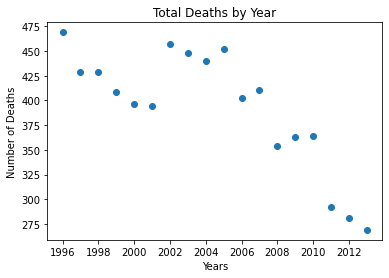

6 of 6 tests passed


In [15]:
#### SCATTER

@typecheck
def main_2(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, 
    returns a scatterplot of the total deaths each year. 
    """
    # Template from HtDAP, based on function composition 
    # None stub
    
    x_values = list(range(1996,2014)) #HELPER
    y_values = deaths_per_year(x_values,read(filename))   #HELPER
    plt.xlabel('Years')
    plt.ylabel("Number of Deaths")
    plt.title('Total Deaths by Year')
    x_ticks = np.arange(1996, 2013, 2)
    plt.xticks(x_ticks)
    plt.scatter(x_values,y_values)
    plt.show()
    
    return None  

@typecheck
def deaths_per_year(loy: List[int],filename: List[MotorVehicleFatalities]) -> List[int]:
    """Return the list of total deaths per year"""
    # template based on arbitrary-sized and the reference rule w/ extra parameter
    # acc is List[int]  
    u_loy = []
    for y in loy:
        u_loy.append(ttl_deaths(read_by_year(y,filename)))
    return u_loy

        
@typecheck
def read_by_year(year:int, file: List[MotorVehicleFatalities]) -> List[MotorVehicleFatalities]: 
    """" return lomvf according to given year"""
    given_file = file 
    # ... (year,file) #template
    # [] stub
    return [mvf for mvf in given_file if mvf.Year == year]


#### Tests  ####

start_testing()

# For main_2
expect(main_2('motor_vehicle_fatalities_by_role.csv'),None)

# For deaths_per_year
expect(deaths_per_year(list(range(1996,2014)),read('motor_vehicle_fatalities_by_role.csv')),
       [469, 429, 429, 409, 396, 394, 457, 448, 440, 452, 402, 411, 354, 363, 364, 292, 281, 269])
expect(deaths_per_year(list(range(1996,2014)),read('test1.csv')),
       [469, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
expect(deaths_per_year(list(range(1996,2014)),read('test2.csv')),
       [0, 429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# For read_by year
expect(read_by_year(1996,read('motor_vehicle_fatalities_by_role.csv')),
       [MotorVehicleFatalities(Year=1996, Role='Cyclist', Fatalities=6),
 MotorVehicleFatalities(Year=1996, Role='Car Driver', Fatalities=235),
 MotorVehicleFatalities(Year=1996, Role='Other', Fatalities=7),
 MotorVehicleFatalities(Year=1996, Role='Pedestrian', Fatalities=71),
 MotorVehicleFatalities(Year=1996, Role='Car Passenger', Fatalities=150)])

expect(read_by_year(1997,read('motor_vehicle_fatalities_by_role.csv')),
       [MotorVehicleFatalities(Year=1997, Role='Cyclist', Fatalities=8),
 MotorVehicleFatalities(Year=1997, Role='Car Driver', Fatalities=231),
 MotorVehicleFatalities(Year=1997, Role='Other', Fatalities=5),
 MotorVehicleFatalities(Year=1997, Role='Pedestrian', Fatalities=50),
 MotorVehicleFatalities(Year=1997, Role='Car Passenger', Fatalities=135)])

summary()

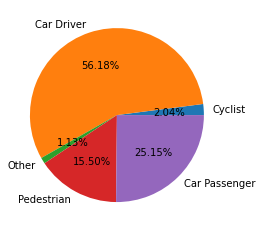

4 of 4 tests passed


In [16]:
### PIE

@typecheck
def main_3(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, 
    returns a piechart of the percentages attributed to total deaths for each role. 
    """
    # Template from HtDAP, based on function composition 
    # None stub
    roles = ['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger']
    percents = percentages(put(['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger'],filename))
    plt.pie(percents,labels=roles,autopct='%1.2f%%')
    plt.show()
    
    return None

@typecheck
def percentages(lod: List[int]) -> List[float]: 
    """ Return the percentage of total deaths attributed to a role """
    # ... (lod) template                        
    # List[int] stub
    return [round((i / 7059)*100,2) for i in lod]


#### TESTS ####

# Test for main_3
start_testing()
expect(main_3('motor_vehicle_fatalities_by_role.csv'),None)

# Test for percentages
expect(percentages(put(['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger'],'motor_vehicle_fatalities_by_role.csv')),
      [2.04, 56.18, 1.13, 15.5, 25.15])
expect(percentages(put(['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger'],'test1.csv')),
      [0.08, 3.33, 0.1, 1.01, 2.12])
expect(percentages(put(['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger'],'test2.csv')),
      [0.11, 3.27, 0.07, 0.71, 1.91])

summary()

## Numerical Analysis

## Total Deaths per year

The output below outlines the number of deaths per year according from 1996 to 2013

In [17]:
deaths_per_year(list(range(1996,2014)),read('motor_vehicle_fatalities_by_role.csv'))

print('Total deaths associated to each year from 1996 to 2013')
print()
for e2 in deaths_per_year(list(range(1996,2014)),read('motor_vehicle_fatalities_by_role.csv')):
    print(e2, end = ' ')



Total deaths associated to each year from 1996 to 2013

469 429 429 409 396 394 457 448 440 452 402 411 354 363 364 292 281 269 

## Total Deaths per Role

The output below outlines the number of deaths per role according from 1996 to 2013

In [18]:
put(['Cyclist','Car Driver','Other','Pedestrian', 'Car Passenger'],'motor_vehicle_fatalities_by_role.csv')

[144, 3966, 80, 1094, 1775]

- Cyclist: 144 Deaths 
- Car Driver: 3966 Deaths 
- Other: 80 Deaths
- Pedestrian: 1094 Deaths
- Car Passenger: 1775 Deaths

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

Will call functions main_1, main_2, main_3

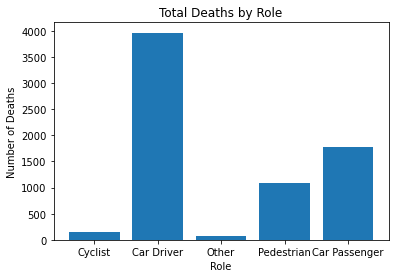

In [19]:
main_1('motor_vehicle_fatalities_by_role.csv')

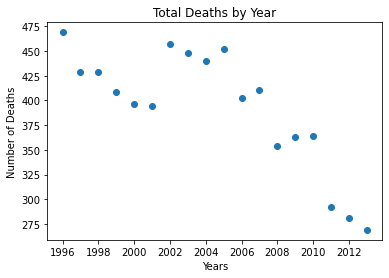

In [20]:
main_2('motor_vehicle_fatalities_by_role.csv')

We see a a downward trend of total deaths per year

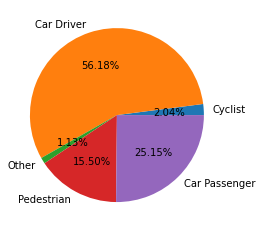

In [21]:
main_3('motor_vehicle_fatalities_by_role.csv')

## Conclusion 

**Safest modes of transportation (safest to least safe)**
1. Cyclist
2. Walking
3. Car

NOTE: Other is discarded from the analysis since it is unreliable.

**Trend for total deaths per year**

Decreasing with increasing years. Inverse relationship between total deaths and increasing years

In [22]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 78012
ASSIGNMENT = 943542 # Final submission

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), layout=Layout(height='100%', width='50%'), options=('project_f…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')

# Please double check your submission on Canvas to ensure that the right files (Jupyter file + CSVs) have been submitted